In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Tushar\Desktop\Day-7\Assignment\general_data.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["EncodedAtt"]=le.fit_transform(df.Attrition)

In [4]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EncodedAtt
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,1


In [5]:
df.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
EncodedAtt                 1.843111
dtype: float64

In [6]:
df.kurtosis()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
EncodedAtt                 1.397690
dtype: float64

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EncodedAtt'],
      dtype='object')

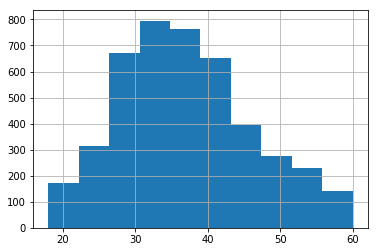

In [28]:
import matplotlib.pyplot as plt
df.Age.hist()
plt.show()

## Non-Parametric Tests

### Since no paired features are present we cannot do Wilcoxon Test and Freidman Test


## Mann Whitney Test
### H0 : There is no Significant impact of Distance From Home on Attrition
### H1 : There is Significant impact of Distance From Home on Attrition

In [9]:
from scipy.stats import mannwhitneyu

In [10]:
stats,p=mannwhitneyu(df.DistanceFromHome,df.EncodedAtt)

In [11]:
print("p-value is ",p)

p-value is  0.0


## Since p-value is 0 we interpret it as p-value<0.001 . So we reject the Null Hypothesis

## Kruskal Wallis Test

## H0 : There is no Significant impact of Percent Salary Hike and Years with current Manager on Attrition
## H1 : There is no Significant impact of Percent Salary Hike and Years with current Manager on Attrition

## Since p-value is 0 we interpret it as p-value<0.001 . So we reject the Null Hypothesis

In [12]:
from scipy.stats import kruskal
stats,p=kruskal(df.PercentSalaryHike,df.YearsWithCurrManager,df.EncodedAtt)

In [13]:
print("p-value is ",p)

p-value is  0.0


## Chi2 Test

In [14]:
from scipy.stats import chi2_contingency

### H0 : There is no Significant impact of Business Travel on Attrition
### H1 : There is Significant impact of Business Travel on Attrition

In [15]:
chitable=pd.crosstab(df.BusinessTravel,df.Attrition)

In [16]:
chitable.head()

Attrition,No,Yes
BusinessTravel,,
Non-Travel,414,36
Travel_Frequently,624,207
Travel_Rarely,2661,468


In [17]:
stats,p,dof,expected=chi2_contingency(chitable)

In [18]:
print("p-value is-",p)

p-value is- 1.764276972983189e-16


## Since p-value <0.005 we reject H0 and can say that Business Travel has Impact on Attrition

In [19]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EncodedAtt
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,1


### H0 : There is no Significant impact of Department on Attrition
### H1 : There is Significant impact of Department on Attrition

In [20]:
chitable=pd.crosstab(df.Department,df.Attrition)

In [21]:
chitable.head()


Attrition,No,Yes
Department,,
Human Resources,132,57
Research & Development,2430,453
Sales,1137,201


In [22]:
stats,p,dof,expected=chi2_contingency(chitable)
print("p-value is-",p)

p-value is- 4.820888218170407e-07


### Since the p-value<0.05 we reject H0 . That means Department has significant impact on Attrition

## 1 Sample Independent t test
## H0 : Age sample means has no significant difrence from Age Population mean
## H1 : Age sample means has significant difrence from Age Population mean

In [23]:
from scipy.stats import ttest_1samp
stats,p=ttest_1samp(df.Age,df.Age[1500:2000].mean())

In [24]:
print("p-value is ",p)

p-value is  0.45041262617780276


### Since p>0.05 we accept H0 i.e. Age sample mean has no significant difrence from Age Population mean

## 2 Sample independent t test
### H0 : AGE has no Significant Impact on Attrition
### H1 : AGE from Home has Significant Impact on Attrition

In [25]:
from scipy.stats import ttest_ind

In [26]:
stats,p=ttest_ind(df.Age,df.EncodedAtt)

In [27]:
print("p-value-",p)

p-value- 0.0


### Since p<0.05 we reject H0 i.e.Age has significant impact on Attrition